In [1]:
import numpy as np 
import pandas as pd


In [2]:
data= pd.read_csv('C:/Users/User/Desktop/Gold_price/simple_gold_price/gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### Data Dictionary

## EDA

In [4]:
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

array([[<AxesSubplot:title={'center':'SPX'}>,
        <AxesSubplot:title={'center':'GLD'}>],
       [<AxesSubplot:title={'center':'USO'}>,
        <AxesSubplot:title={'center':'SLV'}>],
       [<AxesSubplot:title={'center':'EUR/USD'}>, <AxesSubplot:>]],
      dtype=object)

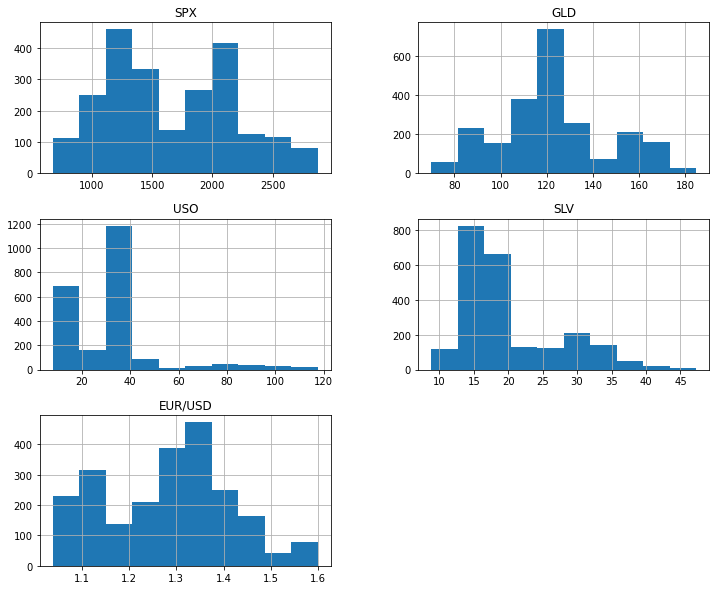

In [8]:
import matplotlib.pyplot as plt
data.hist(figsize=(12,10))

In [9]:
# change date colum to date time create year column
data['Date']= pd.to_datetime(data['Date'])
data['year']= pd.DatetimeIndex(data["Date"]).year


In [10]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008


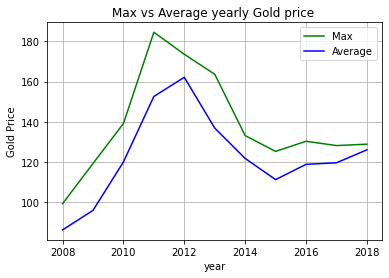

In [11]:
# plot max vs average yearly gold price

data.groupby('year').max()['GLD'].plot(color='green' , label ='Max')
data.groupby('year').mean()['GLD'].plot(color='blue' , label='Average')

plt.ylabel('Gold Price')
plt.legend()
plt.title('Max vs Average yearly Gold price ')
plt.grid()
plt.show()

We notice from the graph that gold prices peaked between 2011 to 2013 and from 2015 prices kept increasing gradually

In [12]:
# plot correlation matrics

<AxesSubplot:>

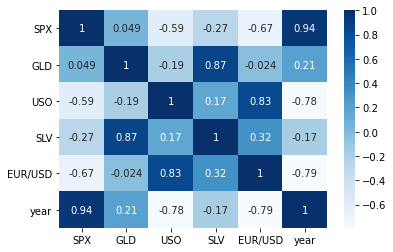

In [13]:
import seaborn as sns
sns.heatmap(data.corr() , annot = True , cmap='Blues')

Correlation Matrix shows Strong positive correlation between gold and silver

In [14]:

corr= data.corr()
corr

,SPX,GLD,USO,SLV,EUR/USD,year
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017,0.944403
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375,0.206654
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317,-0.775765
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631,-0.172485
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000,-0.791655
year,0.944403,0.206654,-0.775765,-0.172485,-0.791655,1.000000


In [15]:
# Gold coorelation with other feature 


corr['GLD'].sort_values(ascending=False)

GLD        1.000000
SLV        0.866632
year       0.206654
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

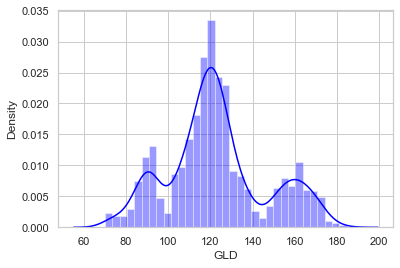

In [16]:
# plot gold distplot

sns.set_theme(style='whitegrid')
sns.distplot(data["GLD"] , color='blue')

Create machine learning Model that takes (SLV, SPX, EUR/UDS, USO) features and predict Gold price

In [17]:
x=data.drop(['Date','year', 'GLD'] ,axis=1)
y= data[['GLD']]

In [18]:
print(x.head())
print('-------------------'*5)
print(y.head())

           SPX        USO     SLV   EUR/USD
0  1447.160034  78.470001  15.180  1.471692
1  1447.160034  78.370003  15.285  1.474491
2  1411.630005  77.309998  15.167  1.475492
3  1416.180054  75.500000  15.053  1.468299
4  1390.189941  76.059998  15.590  1.557099
-----------------------------------------------------------------------------------------------
         GLD
0  84.860001
1  85.570000
2  85.129997
3  84.769997
4  86.779999


In [19]:
## split data set
from sklearn.model_selection import train_test_split

x_train, x_test , y_train ,y_test = train_test_split(x,y ,test_size= 0.2 , random_state= 0)


In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((1832, 4), (1832, 1), (458, 4), (458, 1))

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
# fit model 
model.fit(x_train, y_train)


<ipython-input-21-a8a0435233fc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor()

In [22]:
y_preds= model.predict(x_test)
y_preds

array([127.20779835, 116.86549952, 139.88460045, 121.97209989,
        94.09020033, 155.00170125, 117.49470125, 113.34890124,
       153.09899997, 105.57510048, 103.27599916, 120.28120093,
        92.03779944, 159.25430058, 121.54659847, 117.461801  ,
        86.6160982 ,  91.73279923,  93.00379988, 125.60490002,
        83.38869928, 117.74089901, 126.51589831, 173.2112974 ,
       169.98629711, 140.49420231, 114.36889938, 160.03730189,
       134.01220083, 115.58390052, 111.23800076, 105.05630177,
       128.21720084, 122.05389993,  98.75239958, 120.04129981,
        84.54260011, 114.99280009, 127.39289902, 140.17659864,
       107.33400088, 131.63260095, 108.50509928, 136.73920091,
       133.85269925, 149.64929877, 119.55300039, 156.11120029,
       154.99980208, 127.55309975, 123.66980026, 115.40409842,
       124.05850028, 118.98129975, 153.72510016, 121.52729933,
       112.42590061,  86.91409949, 155.54769965, 118.12430086,
        88.1792994 , 114.69919992,  83.56959929, 146.61

In [23]:
from sklearn import metrics

MSE= metrics.mean_squared_error(y_test,y_preds)
MAE= metrics.mean_absolute_error(y_test,y_preds)
r2= metrics.r2_score(y_test, y_preds)
print (f'Mean Squared Error = {MSE}')
print (f'Mean Absolute Error = {MAE}')
print (f'R-Squared error = {r2}')

Mean Squared Error = 5.2483503601408525
Mean Absolute Error = 1.3027571782314433
R-Squared error = 0.9897981208198771


y_test = list(y_test)
plt.figure(figsize=(12, 8))
plt.plot(y_test, color = 'orange', label = 'True Value')
plt.plot(y_preds, color = 'blue', label = 'Predicted Value')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Gold price')
plt.title('True VS Predicted Values')
plt.grid()
plt.show();